In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm

# フォント一覧を取得
font_list = fm.findSystemFonts()
# フォントファミリーを取得
font_family = [fm.FontProperties(fname=f).get_name() for f in font_list]
# 重複を削除して表示
print(set(font_family))

sns.set(font="Bahnschrift" ,style="white")

{'Eras Bold ITC', 'Lucida Sans', 'Cascadia Code', 'Curlz MT', 'Microsoft Himalaya', 'MV Boli', 'Goudy Old Style', 'Blackadder ITC', 'BIZ UDMincho', 'Tempus Sans ITC', 'Imprint MT Shadow', 'Wingdings', 'Felix Titling', 'Gill Sans MT Ext Condensed Bold', 'Bauhaus 93', 'Palace Script MT', 'Monotype Corsiva', 'Verdana', 'Trebuchet MS', 'Courier New', 'Microsoft Sans Serif', 'Javanese Text', 'Lucida Sans Typewriter', 'HGSoeiKakugothicUB', 'Juice ITC', 'Arial', 'Informal Roman', 'Script MT Bold', 'Microsoft Uighur', 'Poor Richard', 'Centaur', 'Ravie', 'Franklin Gothic Demi Cond', 'Baskerville Old Face', 'Ink Free', 'HGSoeiPresenceEB', 'Tw Cen MT', 'Constantia', 'Wide Latin', 'MingLiU-ExtB', 'Lucida Handwriting', 'Magneto', 'Gill Sans MT Condensed', 'Niagara Engraved', 'Californian FB', 'HGSoeiKakupoptai', 'Palatino Linotype', 'Bell MT', 'MS Gothic', 'Brush Script MT', 'Microsoft JhengHei', 'Eras Light ITC', 'Cascadia Mono', 'Kristen ITC', 'Microsoft New Tai Lue', 'Nirmala UI', 'Berlin Sans F

In [2]:
train = pd.read_csv("./original/train.csv")
test = pd.read_csv("./original/test.csv")
sample = pd.read_csv("./original/sample.csv",header=None)
print("Data Shapes")
print("Train:",train.shape,"Test:",test.shape,"Sample:",sample.shape)

Data Shapes
Train: (207, 12) Test: (40, 11) Sample: (40, 2)


In [3]:
train.head()
train.index = pd.to_datetime(train["datetime"])
train.head()

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
datetime,,,,,,,,,,,,
2013-11-18,2013-11-18,90,月,0,厚切りイカフライ,NaN,NaN,NaN,NaN,快晴,--,19.8
2013-11-19,2013-11-19,101,火,1,手作りヒレカツ,NaN,NaN,NaN,NaN,快晴,--,17.0
2013-11-20,2013-11-20,118,水,0,白身魚唐揚げ野菜あん,NaN,NaN,NaN,NaN,快晴,--,15.5
2013-11-21,2013-11-21,120,木,1,若鶏ピリ辛焼,NaN,NaN,NaN,NaN,快晴,--,15.2
2013-11-22,2013-11-22,130,金,1,ビッグメンチカツ,NaN,NaN,NaN,NaN,快晴,--,16.1


In [4]:
train.describe()

,y,soldout,kcal,payday,temperature
count,207.000000,207.000000,166.000000,10.0,207.000000
mean,86.623188,0.449275,404.409639,1.0,19.252174
std,32.882448,0.498626,29.884641,0.0,8.611365
min,29.000000,0.000000,315.000000,1.0,1.200000
25%,57.000000,0.000000,386.000000,1.0,11.550000
50%,78.000000,0.000000,408.500000,1.0,19.800000
75%,113.000000,1.000000,426.000000,1.0,26.100000
max,171.000000,1.000000,462.000000,1.0,34.600000


In [5]:
train.describe(include="O")

,datetime,week,name,remarks,event,weather,precipitation
count,207,207,207,21,14,207,207
unique,207,5,156,6,2,7,8
top,2013-11-18,水,メンチカツ,お楽しみメニュー,ママの会,快晴,--
freq,1,43,6,12,9,53,169


In [6]:
train["payday"] = train["payday"].fillna(0)
train["precipitation"] = train["precipitation"].apply(lambda x:-1 if x=="--" else float(x))
train["event"] = train["event"].fillna("なし")
train["remarks"] = train["remarks"].fillna("なし")
train["month"] = train["datetime"].apply(lambda x : int(x.split("-")[1]))
train.head()

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature,month
datetime,,,,,,,,,,,,,
2013-11-18,2013-11-18,90,月,0,厚切りイカフライ,NaN,なし,なし,0.0,快晴,-1.0,19.8,11
2013-11-19,2013-11-19,101,火,1,手作りヒレカツ,NaN,なし,なし,0.0,快晴,-1.0,17.0,11
2013-11-20,2013-11-20,118,水,0,白身魚唐揚げ野菜あん,NaN,なし,なし,0.0,快晴,-1.0,15.5,11
2013-11-21,2013-11-21,120,木,1,若鶏ピリ辛焼,NaN,なし,なし,0.0,快晴,-1.0,15.2,11
2013-11-22,2013-11-22,130,金,1,ビッグメンチカツ,NaN,なし,なし,0.0,快晴,-1.0,16.1,11


<Axes: xlabel='datetime'>

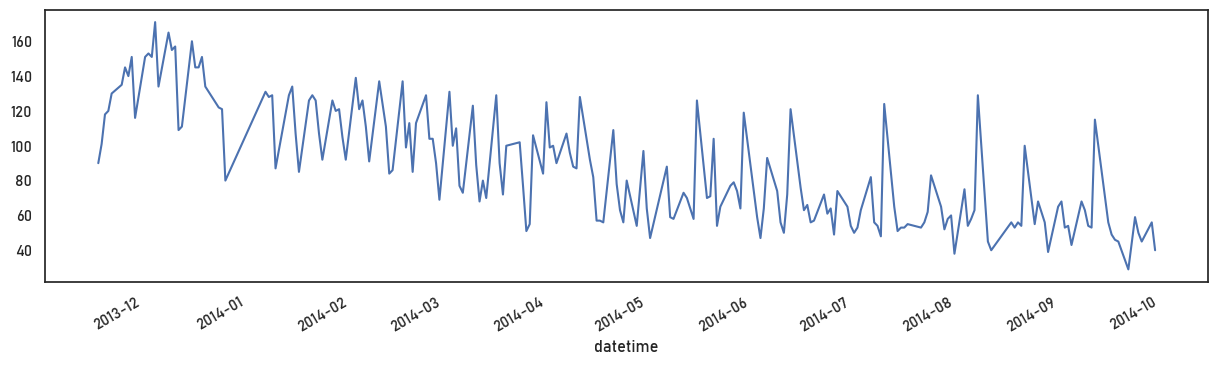

In [8]:
train["y"].plot(figsize=(15,4))

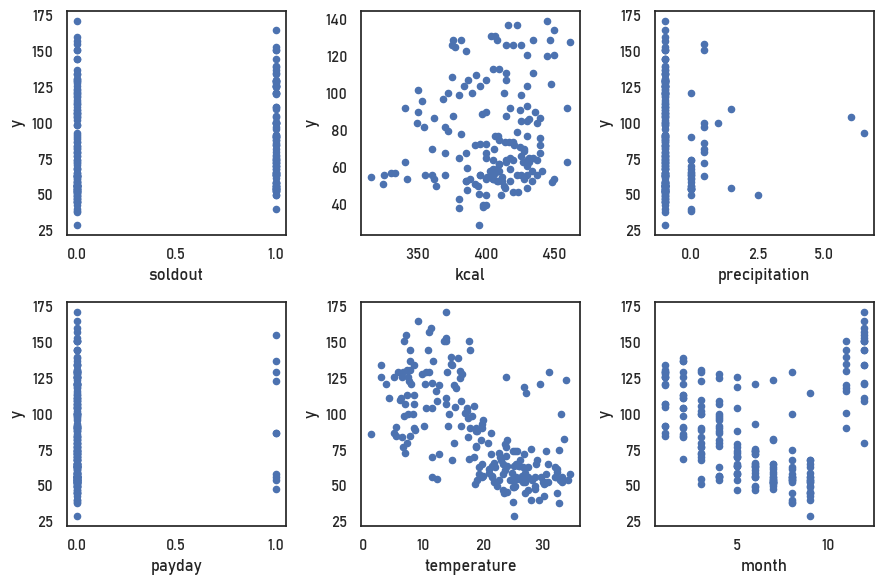

In [12]:
#相関関数を使用してヒートマップ
fig,ax = plt.subplots(2,3,figsize=(9,6))
train.plot.scatter(x="soldout",y="y",ax=ax[0][0])
train.plot.scatter(x="kcal",y="y",ax=ax[0][1])
train.plot.scatter(x="precipitation",y="y",ax=ax[0][2])
train.plot.scatter(x="payday",y="y",ax=ax[1][0])
train.plot.scatter(x="temperature",y="y",ax=ax[1][1])
train.plot.scatter(x="month",y="y",ax=ax[1][2])
plt.tight_layout()